Cleaned Column Names:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
                  Country Name  Year  Birth Rate
0                        Aruba  1960    4.820000
1  Africa Eastern and Southern  1960    6.723226
2                  Afghanistan  1960    7.282000
3   Africa Western and Central  1960    6.459063
4                       Angola  1960    6.708000


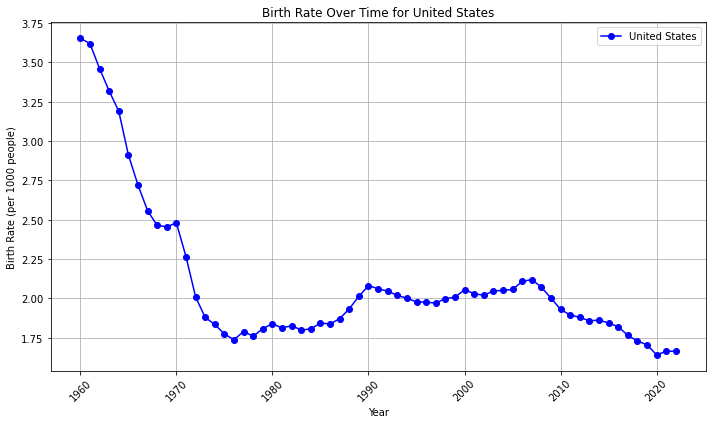

Cleaned Column Names:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
                  Country Name  Year  Birth Rate
0                        Aruba  1960    4.820000
1  Africa Eastern and Southern  1960    6.723226
2                  Afghanistan  1960    7.282000
3   Africa Western and Central  1960    6.459063
4                       Angola  1960    6.708000


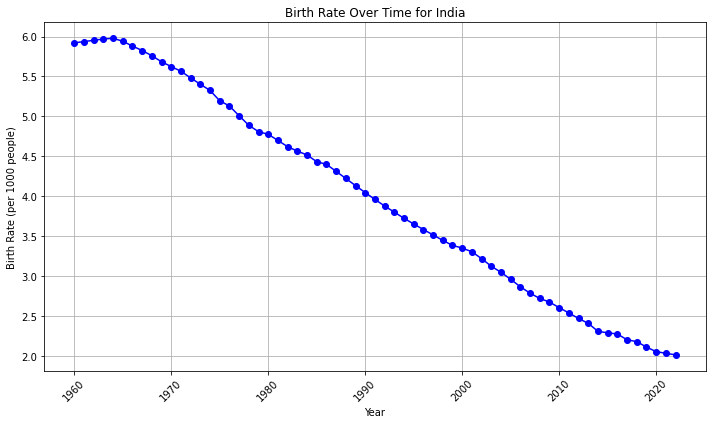

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with correct delimiter and skip bad lines
file_path = r"C:\Users\Lenovo\Downloads\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162\birthrate.csv"
df = pd.read_csv(file_path, delimiter=',', skiprows=4, on_bad_lines='skip')

# Clean the column names by removing extra quotes and spaces
df.columns = df.columns.str.replace('"', '').str.strip()

# Preview the column names to ensure they've been cleaned
print("Cleaned Column Names:")
print(df.columns)

# Filter only the relevant columns (Country Name + the years 1960–2023)
df_clean = df[['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', 
               '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', 
               '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', 
               '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', 
               '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', 
               '2018', '2019', '2020', '2021', '2022', '2023']]

# Reshape the dataset to long format (years in 'Year' and birth rates in 'Birth Rate')
df_long = pd.melt(df_clean, id_vars=["Country Name"], var_name="Year", value_name="Birth Rate")

# Convert 'Year' to integer and 'Birth Rate' to numeric, handling errors gracefully
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long['Birth Rate'] = pd.to_numeric(df_long['Birth Rate'], errors='coerce')

# Drop rows with missing birth rate data
df_long = df_long.dropna(subset=['Birth Rate'])

# Preview the reshaped data
print(df_long.head())

# Choose a country to visualize (e.g., 'United States')
country_name = 'United States'  # Change this to any country present in your dataset
df_country = df_long[df_long['Country Name'] == country_name]

# Plotting the birth rate over time for the selected country
plt.figure(figsize=(10, 6))
plt.plot(df_country['Year'], df_country['Birth Rate'], marker='o', color='b', label=country_name)
plt.title(f'Birth Rate Over Time for {country_name}')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1000 people)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


#data cleaning and loading

import pandas as pd
file_path = r"C:\Users\Lenovo\Downloads\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162\birthrate.csv"
df = pd.read_csv(file_path, delimiter=',', skiprows=4, on_bad_lines='skip')
df.columns = df.columns.str.replace('"', '').str.strip()
print("Cleaned Column Names:")
print(df.columns)
#Handling & Preprocessing

df_long = pd.melt(df[['Country Name'] + [str(year) for year in range(1960, 2024)]], 
                  id_vars=["Country Name"], var_name="Year", value_name="Birth Rate")
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['Birth Rate'] = pd.to_numeric(df_long['Birth Rate'], errors='coerce')
df_long.dropna(subset=['Birth Rate'], inplace=True)
print(df_long.head())
#Visualization

import matplotlib.pyplot as plt
df_country = df_long[df_long['Country Name'] == 'India']
plt.figure(figsize=(10, 6))
plt.plot(df_country['Year'], df_country['Birth Rate'], marker='o', color='b')
plt.title('Birth Rate Over Time for India')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1000 people)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
